<a href="https://colab.research.google.com/github/gaso/dataviz_pec2/blob/main/analisis_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Importar Librerias Necesarias
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np

# Descifrando el Destino del Titanic: Un Viaje a Través de los Datos

## Introducción
Este análisis emprende un viaje retrospectivo para revelar las historias que yacen detrás de los números del Titanic. A través de visualizaciones elocuentes e ingeniosas, se investigan las distintas capas sociales presentes en la nave, así como también sus posibilidades para sobrevivir y su perfil demográfico.



In [47]:
# Cargar conjunto de datos
df = pd.read_csv('https://raw.githubusercontent.com/gaso/dataviz_pec2/main/datasets/titanic.csv')

La información fue recopilada inicialmente por la Junta de Comercio británica como parte de su investigación sobre el hundimiento del barco. Se basa en datos recopilados por esta junta y reimpresos en el informe "British Board of Trade (1990), Informe sobre la pérdida del 'Titanic' (S.S.)". Además, Robert J. MacG. Dawson revisó y publicó un artículo titulado "The 'Unusual Episodio' Data Revisited" en Journal Statistics Education que revisó conjuntos de datos actuales típicamente utilizados para análisis estadístico y fines educativos en 1995.

A continuación se presenta una muestra del conjunto de datos que se empleará para el analisis, costa de 156 observaciones y 12 columnas.

In [48]:
# Comprobar carga exitosa de dataset
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Pie Chart

El gráfico circular representa visualmente la distribución porcentual de los pasajeros del Titanic según su clase de viaje. Un vistazo rápido revela que la mayoría de los pasajeros, el 61,5%, viajaron en tercera clase, lo que indica que era la opción más asequible o popular entre los viajeros del Titanic. La primera y segunda clase tienen una representación igual del 19,2% cada una, lo que sugiere que menos pasajeros podrían permitirse o elegir estas opciones más caras. Este tipo de gráfico es útil para comprender la estructura de datos en términos de proporciones y facilita una comparación rápida entre categorías.

In [6]:
# Crear el Pie Chart

df['class_name'] = df['Pclass'].replace({1: 'Primera Clase', 2: 'Segunda Clase', 3: 'Tercera Clase'})

# Obtener el conteo de pasajeros por clase y crear una nueva columna con estos conteos
df['count'] = df['class_name'].map(df.groupby('class_name')['PassengerId'].count())

# Crear el Pie Chart
fig = px.pie(df, names='class_name', title='Distribución de pasajeros por Clase',
             hover_data=['count'],
             labels={'class_name':'Clase'})
fig.update_traces(textinfo='percent+label+text')
fig.update_layout(clickmode='none')
fig.show()

Entre las variantes del grafico circular se encuentra la llamada Sunburst (Resplandor Solar) el cual permite visualizar la información en forma de anillo conservando cierta jerarquía entre los niveles. Tomando el ejemplo anterior sobre el mismo grafico que nos muestra la segregación de Clases podemos representar por cada una de ellas el desenlace de los pasajeros en función de la clase proporcionándonos más información y un entendimiento más holístico de las relaciones entre las distintas variables.

De este grafico surgen preguntas como ¿Teniendo en cuenta la proporción de los datos hubo mayor prioridad sobre la primera y segunda clase?

In [8]:
# Se organiza estructura de datos para adecuarla al grafico
sunburst_data = df.groupby(['class_name', 'Survived']).size().unstack().reset_index()
sunburst_data.columns = ['class_name', 'No Sobrevivientes', 'Sobrevivientes']

# Obtener los totales por clase
sunburst_data['Total'] = sunburst_data['No Sobrevivientes'] + sunburst_data['Sobrevivientes']

# Intercalar los totales con los valores individuales
values_text = [val for pair in zip(sunburst_data['Total'], sunburst_data['Sobrevivientes'], sunburst_data['No Sobrevivientes']) for val in pair]

fig = go.Figure(go.Sunburst(
    labels=["Primera Clase", "Sobrevivientes 1", "No Sobrevivientes 1", "Segunda Clase", "Sobrevivientes 2", "No Sobrevivientes 2", "Tercera Clase", "Sobrevivientes 3", "No Sobrevivientes 3"],
    parents=["", "Primera Clase", "Primera Clase", "", "Segunda Clase", "Segunda Clase", "", "Tercera Clase", "Tercera Clase"],
    values=values_text,
    text=values_text,
    textinfo='label+value',
    branchvalues='total',
    insidetextorientation='horizontal',
))
fig.update_layout(title='Distribución de pasajeros y supervivencia por Clase', margin=dict(t=30, l=0, r=0, b=0))
fig.show()

# Alluvial Chart

El gráfico aluvial, es una representación visual de cómo las diferentes categorías de datos se conectan y fluyen entre sí, de forma muy similar a como el agua cambia de curso en un río aluvial. Al analizar los datos del Titanic utilizando este método de diagrama, se ilustran las conexiones entre la clase de pasajeros, el género y la tasa de supervivencia; brindándonos una visión integral de su interrelación. Podemos detectar patrones como si las mujeres de primera clase tenían mayores posibilidades de sobrevivir que las de tercera clase; resaltando así la dinámica social y las decisiones de rescate durante el trágico accidente.

En alguna película escuchamos la exclamación de *¡Mujeres y niños primero!* ; pues en este grafico podemos observar de una manera muy clara como comparando en términos de proporciones las mujeres pudieron ser rescatadas en mayor numero que los hombres; tambien a través de los datos podemos desvirtúa que al menos en el caso de las mujeres la tercera clase tuvo un número importante de mujeres rescatadas.

In [27]:
# Preparar el DataFrame de clase a género
class_to_sex = df.groupby(['Pclass', 'Sex']).size().reset_index(name='Count')
class_to_sex['Pclass'] = class_to_sex['Pclass'].map({1: 'Primera Clase', 2: 'Segunda Clase', 3: 'Tercera Clase'})

# Preparar el DataFrame de género a supervivencia
sex_to_survived = df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')
sex_to_survived['Survived'] = sex_to_survived['Survived'].map({0: 'No Sobrevivió', 1: 'Sobrevivió'})

# Unir los DataFrames
links = pd.concat([class_to_sex.assign(stage=1), sex_to_survived.assign(stage=2)])

# Crear listas de labels y mapeos
labels = pd.concat([links['Pclass'], links['Sex'], links['Survived']]).astype(str).unique()
labels_dict = {label: idx for idx, label in enumerate(labels)}

# Asignar índices a las fuentes y destinos
links['Source'] = links.apply(lambda x: labels_dict[x['Pclass']] if x['stage'] == 1 else labels_dict[x['Sex']], axis=1)
links['Target'] = links.apply(lambda x: labels_dict[x['Sex']] if x['stage'] == 1 else labels_dict[x['Survived']], axis=1)


# Crear el diagrama aluvial
fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=labels
    ),
    link=dict(
      source=links['Source'],
      target=links['Target'],
      value=links['Count']
    ))])

fig.update_layout(title_text="Diagrama aluvial de supervivencia del Titanic", font_size=14)
fig.show()


# Rain Cloud Plots
El Rain Cloud Plot generado para el conjunto de datos del Titanic permite observar la distribución de edades de los pasajeros en relación con su supervivencia. Las áreas sombreadas indican densidad de pasajeros por grupo de edad, ampliándose en zonas de mayor concentración. Los puntos del gráfico representan edades individuales distribuidas para minimizar la superposición y mejorar la legibilidad. Los diagramas de caja superpuestos proporcionan un resumen estadístico que destaca las medianas, los cuartiles y los valores atípicos, al tiempo que facilitan la comparación entre los grupos de supervivencia.

In [42]:
# Filtrar los datos para excluir valores perdidos en la columna 'Age'
df_filtered = df.dropna(subset=['Age'])

# Crear el violin plot
fig = go.Figure()

# Añadir el violin plot para los que no sobrevivieron
fig.add_trace(go.Violin(x=df_filtered['Survived'][df_filtered['Survived'] == 0],
                        y=df_filtered['Age'][df_filtered['Survived'] == 0],
                        legendgroup='No', scalegroup='No', name='No Sobrevivieron',
                        line_color='blue'))

# Añadir el violin plot para los que sobrevivieron
fig.add_trace(go.Violin(x=df_filtered['Survived'][df_filtered['Survived'] == 1],
                        y=df_filtered['Age'][df_filtered['Survived'] == 1],
                        legendgroup='Yes', scalegroup='Yes', name='Sobrevivieron',
                        line_color='orange'))

# Añadir el strip plot para los que no sobrevivieron
fig.add_trace(go.Scatter(x=df_filtered['Survived'][df_filtered['Survived'] == 0],
                         y=df_filtered['Age'][df_filtered['Survived'] == 0],
                         mode='markers', name='No Sobrevivieron',
                         marker=dict(color='blue', size=3, opacity=0.6)))

# Añadir el strip plot para los que sobrevivieron
fig.add_trace(go.Scatter(x=df_filtered['Survived'][df_filtered['Survived'] == 1],
                         y=df_filtered['Age'][df_filtered['Survived'] == 1],
                         mode='markers', name='Sobrevivieron',
                         marker=dict(color='red', size=3, opacity=0.6)))

# Añadir el violin plot para los que no sobrevivieron
fig.add_trace(go.Violin(x=df_filtered['Survived'][df_filtered['Survived'] == 0],
                        y=df_filtered['Age'][df_filtered['Survived'] == 0],
                        legendgroup='No', scalegroup='No', name='No Sobrevivieron',
                        line_color='blue',
                        box_visible=True,
                        box=dict(line=dict(color='black'))))

# Añadir el violin plot para los que sobrevivieron
fig.add_trace(go.Violin(x=df_filtered['Survived'][df_filtered['Survived'] == 1],
                        y=df_filtered['Age'][df_filtered['Survived'] == 1],
                        legendgroup='Yes', scalegroup='Yes', name='Sobrevivieron',
                        line_color='orange',
                        box_visible=True,
                        box=dict(line=dict(color='black'))))

# Ajustar la visualización
fig.update_traces(marker=dict(size=4), selector=dict(type='scatter'))
fig.update_traces(width=0.5, selector=dict(type='violin'))

fig.show()

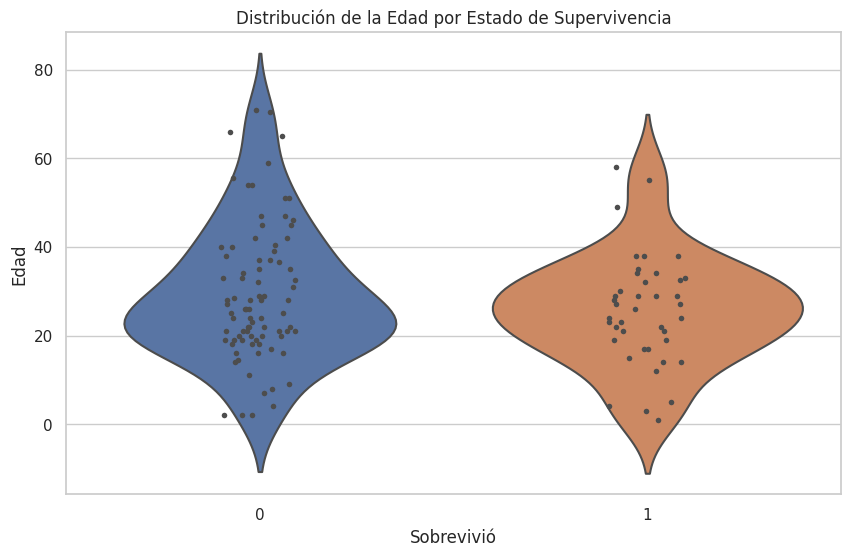

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt



# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear una figura y un conjunto de subtramas
plt.figure(figsize=(10, 6))

# Dibujar un plot de puntos (stripplot) que mostrará los datos individuales
sns.stripplot(x="Survived", y="Age", data=df, size=4, color=".3", linewidth=0)

# Dibujar un plot de densidad (violinplot) que mostrará la densidad de los datos
sns.violinplot(x="Survived", y="Age", data=df, inner=None)

# Añadir etiquetas y un título
plt.title('Distribución de la Edad por Estado de Supervivencia')
plt.xlabel('Sobrevivió')
plt.ylabel('Edad')

# Mostrar el gráfico
plt.show()

In [38]:
# Añadir el violin plot para los que no sobrevivieron
fig.add_trace(go.Violin(x=df_filtered['Survived'][df_filtered['Survived'] == 0],
                        y=df_filtered['Age'][df_filtered['Survived'] == 0],
                        legendgroup='No', scalegroup='No', name='No Sobrevivieron',
                        line_color='blue',
                        box_visible=True))  # Habilitar la visualización del boxplot interno

# Añadir el violin plot para los que sobrevivieron
fig.add_trace(go.Violin(x=df_filtered['Survived'][df_filtered['Survived'] == 1],
                        y=df_filtered['Age'][df_filtered['Survived'] == 1],
                        legendgroup='Yes', scalegroup='Yes', name='Sobrevivieron',
                        line_color='orange',
                        box_visible=True))  # Habilitar la visualización del boxplot interno


# Añadir un pequeño ruido aleatorio a la coordenada x para simular el jitter
jitter = 0.1  # Ajusta este valor para cambiar la cantidad de dispersión
x_no_survived = np.random.normal(0, jitter, size=len(df_filtered[df_filtered['Survived'] == 0]))
x_survived = np.random.normal(1, jitter, size=len(df_filtered[df_filtered['Survived'] == 1]))

# Añadir el scatter plot para los que no sobrevivieron con jitter
fig.add_trace(go.Scatter(x=x_no_survived,
                         y=df_filtered['Age'][df_filtered['Survived'] == 0],
                         mode='markers', name='No Sobrevivieron',
                         marker=dict(color='blue', size=3, opacity=0.6)))

# Añadir el scatter plot para los que sobrevivieron con jitter
fig.add_trace(go.Scatter(x=x_survived,
                         y=df_filtered['Age'][df_filtered['Survived'] == 1],
                         mode='markers', name='Sobrevivieron',
                         marker=dict(color='orange', size=3, opacity=0.6)))

# Ajustar la visualización
fig.update_traces(marker=dict(size=4), selector=dict(type='scatter'))
fig.update_traces(width=0.5, selector=dict(type='violin'))

fig.show()